In [2]:

# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importamos las funciones necesarias para transformar el df entrante

In [3]:
from ipynb.fs.defs.clusterai_bruno_acosta_transformations import fill_median,drop_na,remove_unknown

## Importamos el data frame con pandas

In [4]:
df_raw = pd.read_csv("./bank_subscription (1).csv",delimiter=';',)

## Análisis Exploratorio de Datos

Veamos como luce el mismo y ciertos datos de interes

In [5]:
df_raw.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0


In [6]:
df_raw.shape

(45211, 17)

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40238 non-null  float64
 1   Job                    40238 non-null  object 
 2   Marital Status         40238 non-null  object 
 3   Education              40238 non-null  object 
 4   Credit                 40238 non-null  object 
 5   Balance (euros)        40238 non-null  float64
 6   Housing Loan           37525 non-null  object 
 7   Personal Loan          37525 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  37525 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  37525 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

In [8]:
df_raw.isna().sum()

Age                      4973
Job                      4973
Marital Status           4973
Education                4973
Credit                   4973
Balance (euros)          4973
Housing Loan             7686
Personal Loan            7686
Contact                     0
Last Contact Day            0
Last Contact Month          0
Last Contact Duration    7686
Campaign                    0
Pdays                    7686
Previous                    0
Poutcome                    0
Subscription                0
dtype: int64

Veamos esta información graficamente

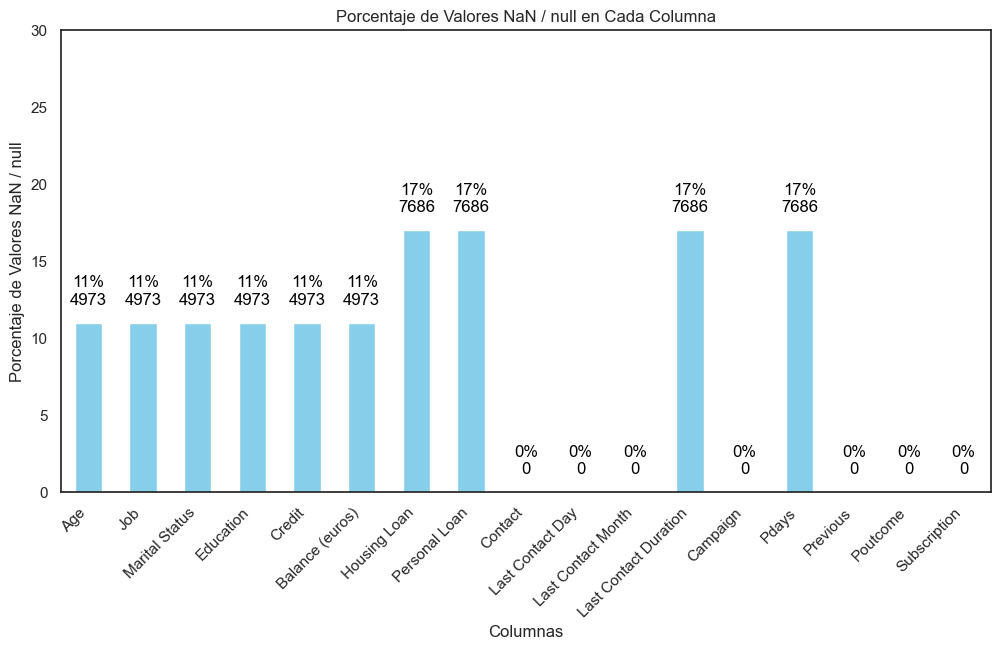

In [33]:
nan_percentage = df_raw.isnull().mean() * 100
nan_count = df_raw.isnull().sum()

plt.figure(figsize=(12, 6))
ax = nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Valores NaN / null en Cada Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Valores NaN / null')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas con valores de las barras y conteo de filas NaN
for i, (porcentaje, conteo) in enumerate(zip(nan_percentage, nan_count)):
    plt.text(i, porcentaje + 1, f'{porcentaje:.0f}%\n{conteo}', ha="center", va="bottom", color='black')

# Ampliar el eje y al 30%
ax.set_ylim(0, 30)

plt.show()

Se puede notar que hay algun tipo de patron con los datos. En las primeras 6 filas hay exactamente 4973 Na. Vamos a ver como lucen esas filas.

In [11]:
df_raw.query('Age.isna()')

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
26,NaN,NaN,single,tertiary,no,255.0,yes,NaN,unknown,5,may,296.0,1,-1.0,0,unknown,0
28,NaN,management,single,secondary,no,-246.0,NaN,no,unknown,5,may,255.0,2,-1.0,0,unknown,0
71,NaN,services,married,secondary,no,25.0,yes,NaN,unknown,5,may,172.0,1,-1.0,0,unknown,0
72,NaN,NaN,married,secondary,no,282.0,yes,yes,unknown,5,may,154.0,1,NaN,0,unknown,0
74,NaN,NaN,married,secondary,no,1937.0,yes,no,unknown,5,may,NaN,1,-1.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45155,NaN,entrepreneur,married,tertiary,NaN,121.0,NaN,no,cellular,9,nov,248.0,1,91.0,1,success,1
45167,NaN,admin.,married,secondary,no,NaN,no,no,cellular,10,nov,228.0,1,NaN,0,unknown,0
45170,NaN,student,single,primary,no,245.0,no,no,telephone,10,nov,98.0,2,110.0,2,other,0
45171,NaN,admin.,single,secondary,no,690.0,no,no,cellular,10,nov,223.0,3,555.0,16,failure,0


Ese numero termina siendo una coincidencia. No se tienen 4973 filas con falta de datos, sino que son muchas mas con valores NaN.

In [35]:
print(f'Las filas que contienen algún valor NaN son {len(df_raw[df_raw.isnull().any(axis=1)])}')

Las filas que contienen algún valor NaN son 34581


Antes de analizar las features, veamos en un simple gráfico la proporción de Subscripciones en el data set total

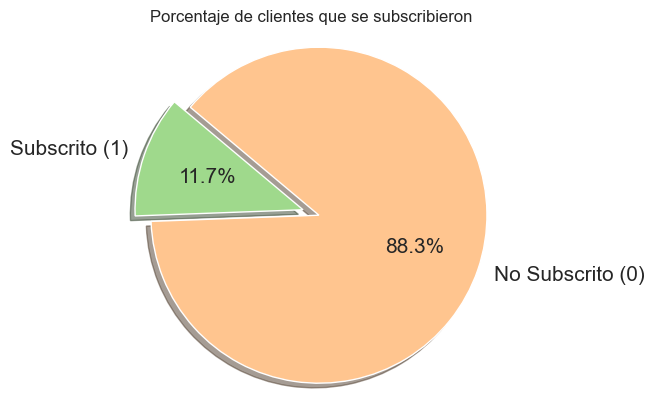

In [58]:
import matplotlib.pyplot as plt

# Filtrar los datos donde la columna 'Subscripcion' es igual a 1
subscribed_data = df_raw[df_raw['Subscription'] == 1]

# Calcular el porcentaje de datos con 'Subscripcion' igual a 1
percentage_subscribed = (len(subscribed_data) / len(df_raw)) * 100

# Crear un gráfico de torta
labels = ['Subscrito (1)', 'No Subscrito (0)']
sizes = [percentage_subscribed, 100 - percentage_subscribed]
colors = ['#9FD98C','#FFC58F']
explode = (0.1, 0)  # Explode la primera porción

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 15})
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.title('Porcentaje de clientes que se subscribieron')

# Mostrar el gráfico
plt.show()

Analicemos las variables numéricas

In [37]:
df_raw.describe()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,40238.000000,40238.000000,45211.000000,37525.000000,45211.000000,37525.000000,45211.000000,45211.000000
mean,40.929768,1367.154257,15.806419,258.511446,2.763841,40.020546,0.580323,0.116985
std,10.631666,3079.452512,8.322476,257.827942,3.098021,99.728432,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1425.750000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


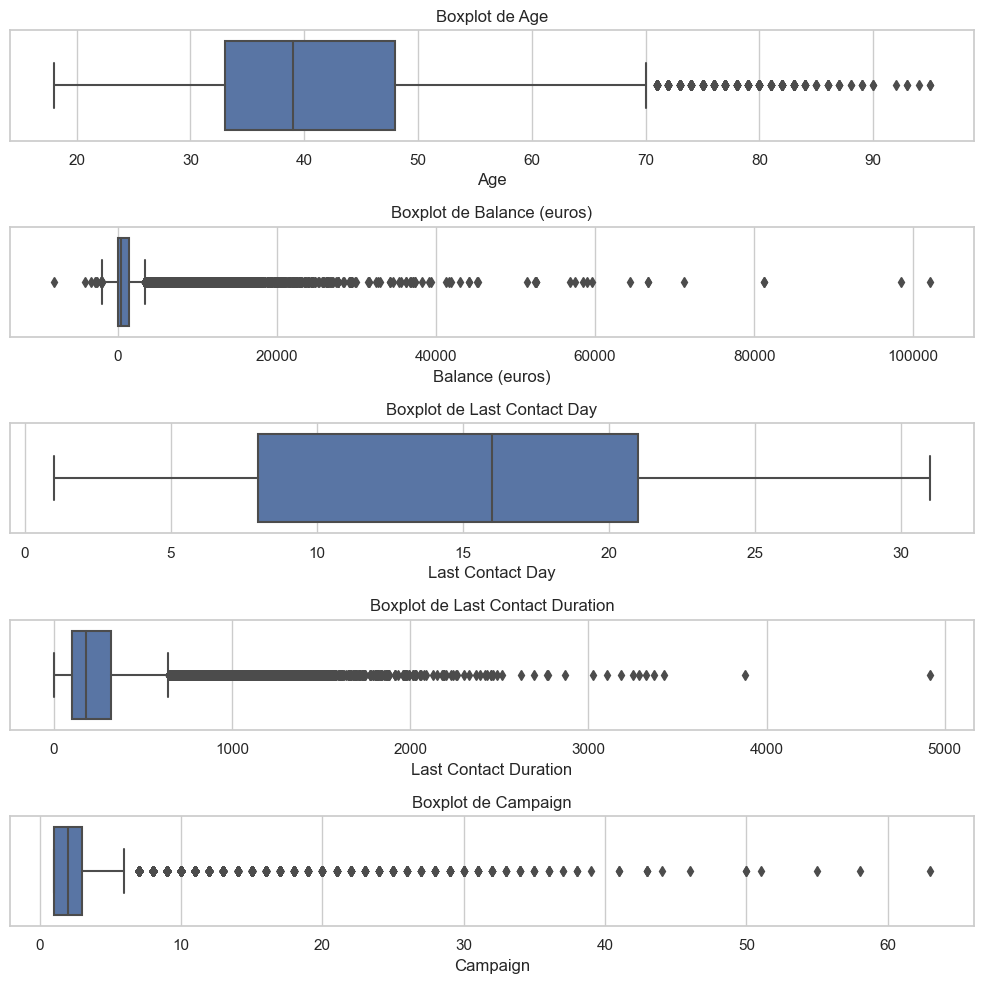

In [14]:
# Columnas numericas de interes
columns_to_plot = ['Age', 'Balance (euros)', 'Last Contact Day', 'Last Contact Duration', 'Campaign']

# Estilo
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 2 * len(columns_to_plot)))

# Creamos el plot para cada columna
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df_raw[column], ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

Se sacan ciertas conclusiones:
1. Más del 50% de los clientes del banco están entre los 30 y 40 años.
2. La mayoría de los clientes tienen un balance promedio de poco mas de 1300 dolares, pero los datos tienen un gran desvío, contando con una gran cantidad de outliers.
3. Se suele contactar a los clientes a mitad de mes.
4. La mediana de un contacto es de 3 minutos, y el 75% de los contactos no superan los 6 minutos, pero hay contactos muchisimos mas largos.
5. Podemos ver que a la gran mayoría de los clientes se lo contactó no más de 3 veces, pero hay varios casos de una gran cantidad de contactos.

En las otras dos columnas numéricas, sucede que si no hubo contacto previo, Pdays vale 1 y Previous vale 0, por lo cual ver un boxplot de estos valors sin ningún filtro no nos proporciona mucha información

Veamos cuantas filas tuvieron contacto previo

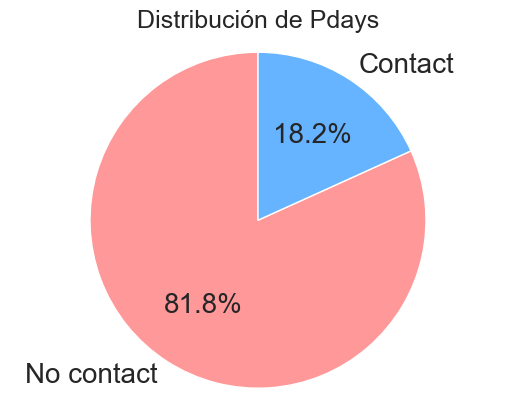

In [47]:
# Filtrar las filas donde Pdays es mayor que -1
contact_df = df_raw[df_raw['Pdays'] > -1]

# Filtrar las filas donde Pdays es igual a -1
no_contact_df = df_raw[df_raw['Pdays'] == -1]

# Contar la cantidad de filas donde Pdays vale -1 y es mayor que -1
total_rows = len(df_raw)
contact = len(contact_df)
no_contact = len(no_contact_df)

# Crear datos para el gráfico de torta
labels = ['No contact', 'Contact']
sizes = [no_contact, contact]

# Configurar colores
colores = ['#ff9999', '#66b3ff']

# Crear el gráfico de torta
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p), textprops={'fontsize': 20}, colors=colores, startangle=90)
ax1.axis('equal')  # Equal aspect ratio garantiza que la torta sea un círculo.

plt.title('Distribución de Pdays',fontsize=18)
plt.show()

Y ahora veamos para cada fila, su porcentaje de susbcripciones exitosas

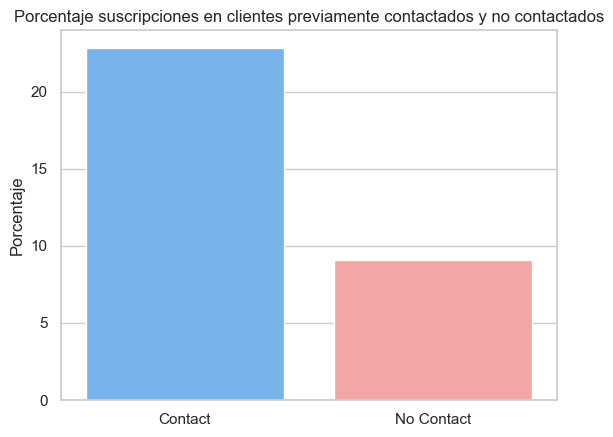

In [16]:
# Calcular los porcentajes de Subscription igual a 1 en cada categoría
contact_subscription_percentage = (contact_df['Subscription'] == 1).mean() * 100
no_contact_subscription_percentage = (no_contact_df['Subscription'] == 1).mean() * 100

# Crear datos para el gráfico de barras
categories = ['Contact', 'No Contact']
percentages = [contact_subscription_percentage, no_contact_subscription_percentage]

# Configurar colores
colores = ['#66b3ff', '#ff9999']

# Crear el gráfico de barras
sns.barplot(x=categories, y=percentages, palette=colores)
plt.title('Porcentaje suscripciones en clientes previamente contactados y no contactados')
plt.ylabel('Porcentaje')
plt.show()

Por ultimo, veamos sus boxplot, pero unicamente en los casos donde hubo contacto previo

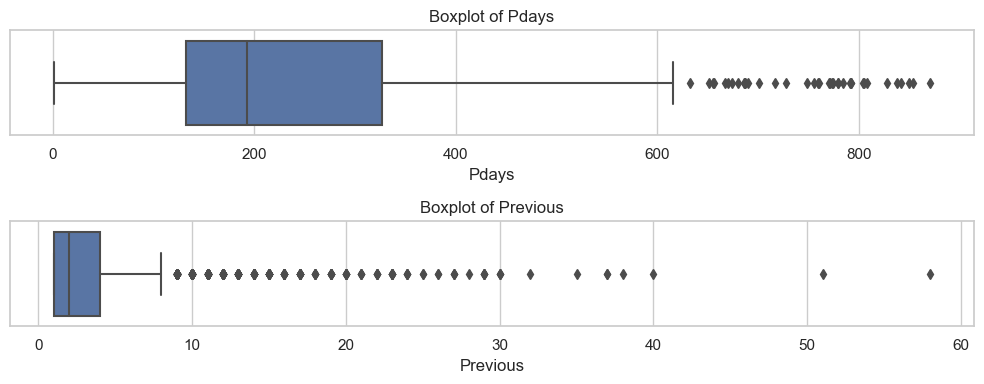

In [17]:
# Columnas numericas de interes
columns_to_plot = ['Pdays', 'Previous']

# Estilo
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 2 * len(columns_to_plot)))

# Creamos el plot para cada columna
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df_raw[(df_raw['Pdays'] > -1) & (df_raw['Previous'] < 275)][column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Con toda esta información, podemos concluir en primer lugar que un contacto previo aumenta las probabilidades de que el cliente se subscriba a la campaña actual.
Por otro lado, en los casos donde hubo contacto previo, suele ser entre 6 y 12 meses aproximadamente, mientras que la cantidad de contactos previos se comporta de manera similar a los contactos de la campaña actual.

Analicemos en primer lugar, como se correlacionan estas variables

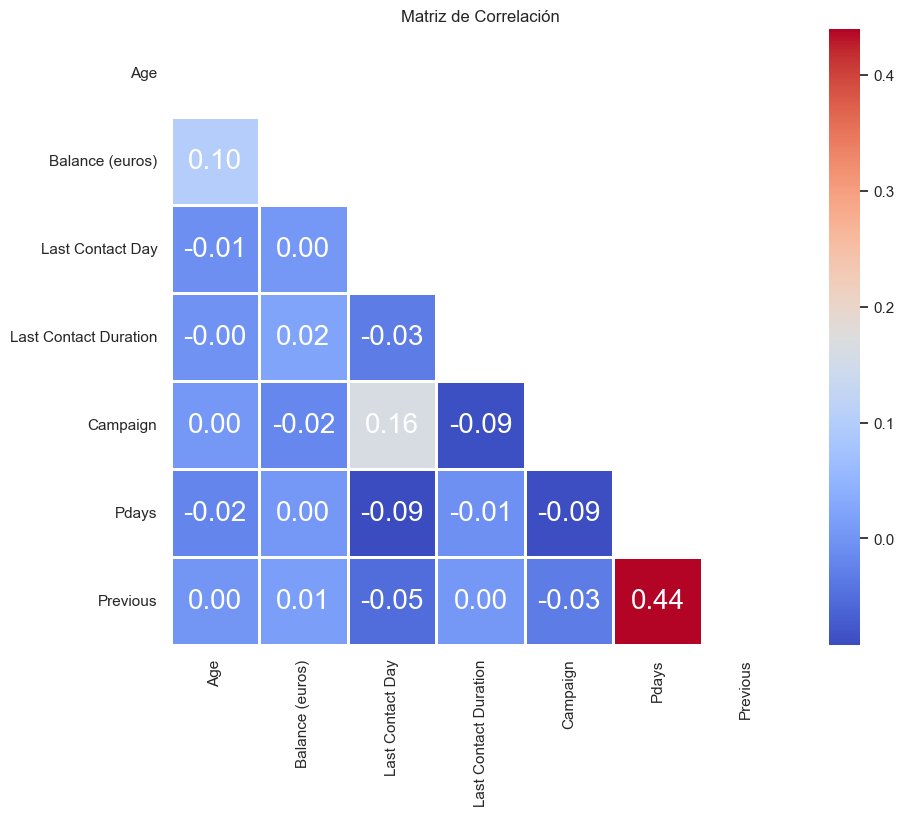

In [42]:
# Seleccionar las columnas de interés
correlation_columns = ['Age', 'Balance (euros)', 'Last Contact Day', 'Last Contact Duration', 'Campaign', 'Pdays', 'Previous']
correlation_data = df_raw[correlation_columns]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Configurar el estilo de seaborn
sns.set(style="white")

# Crear una máscara para ocultar la mitad superior de la matriz de correlación
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor con la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask, linewidths=1,
            annot_kws={"size": 20, "color": 'white'}, fmt=".2f")

plt.title('Matriz de Correlación')
plt.show()

Es lógico que Pdays y Previous tengan la correlación mas fuerte, ya que en mas del 80% de los datos si Pdays vale -1, Previous vale 0.

Veamos un pairplot de todas las variables en función de la variable target

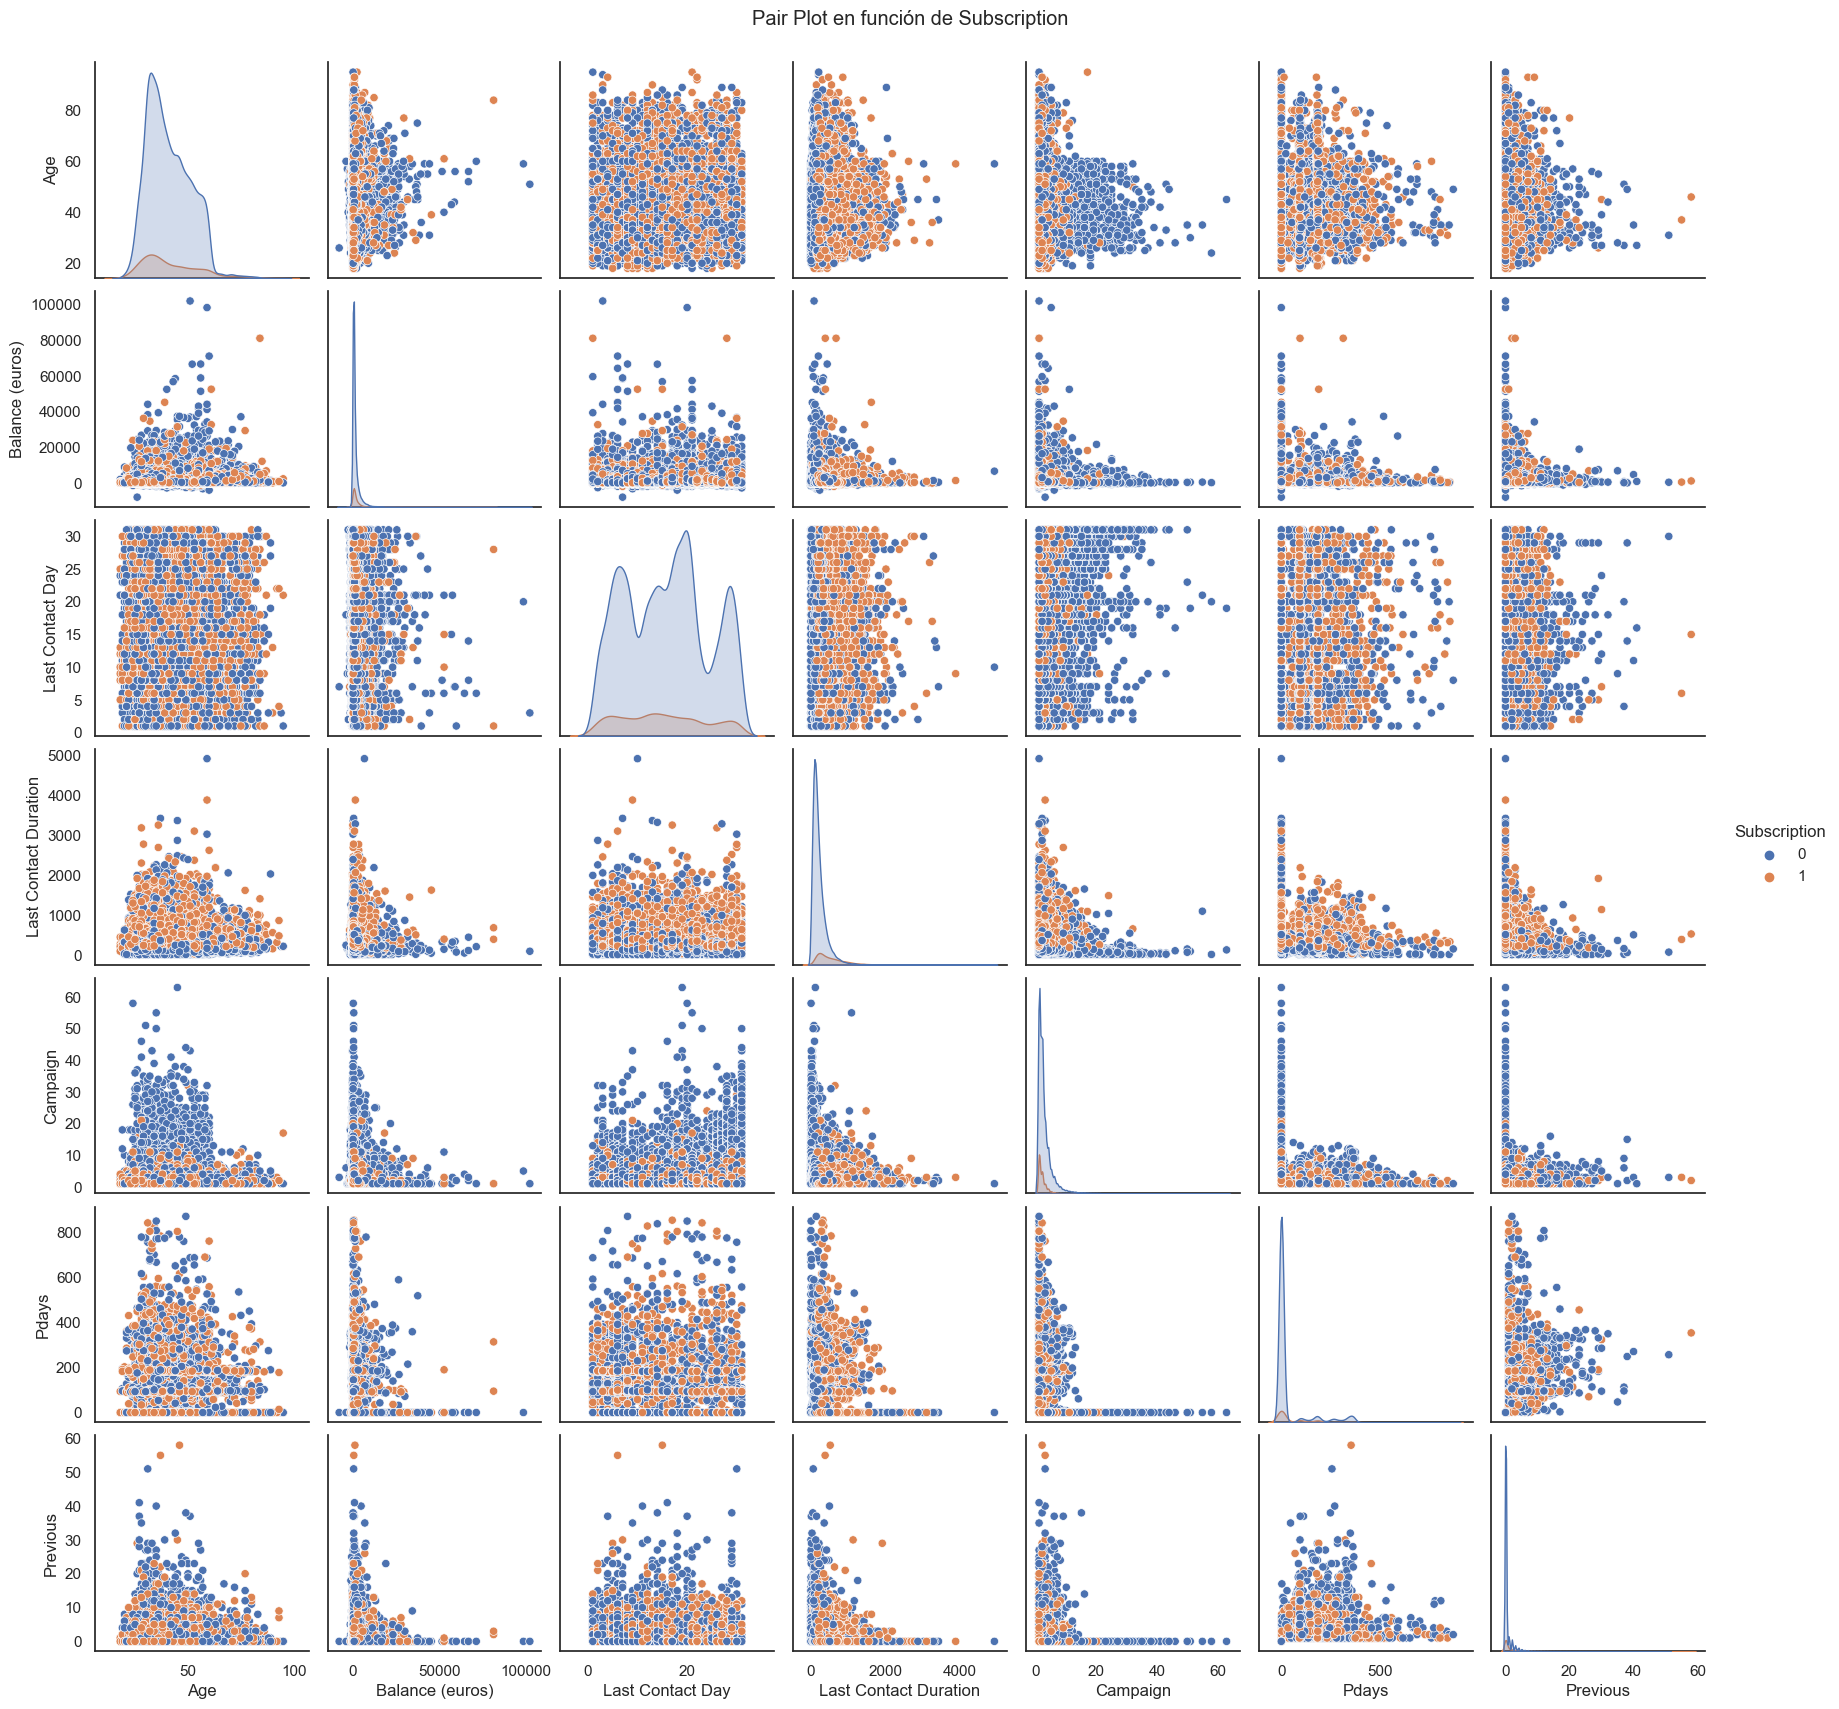

In [19]:
df_filtrado = df_raw[df_raw['Previous'] < 275]

# Crea el Pair Plot
sns.pairplot(df_filtrado, vars=correlation_columns, diag_kind='auto', hue='Subscription')  

plt.subplots_adjust(top=0.95)
plt.suptitle("Pair Plot en función de Subscription")
plt.show()

Ya que no hay una fuerte correlación entre variables, no se pueden sacar muchas conclusiones, pero si se puede ver que:
1. Una vez que se contacta demasiadas veces al cliente, es mas probable que no acceda a la subscripción.
2. Parecería que a mayor duración del último contacto y a mayor balance, se obtienen mas subscripciones.

Pasemos a las variables de texto ahora

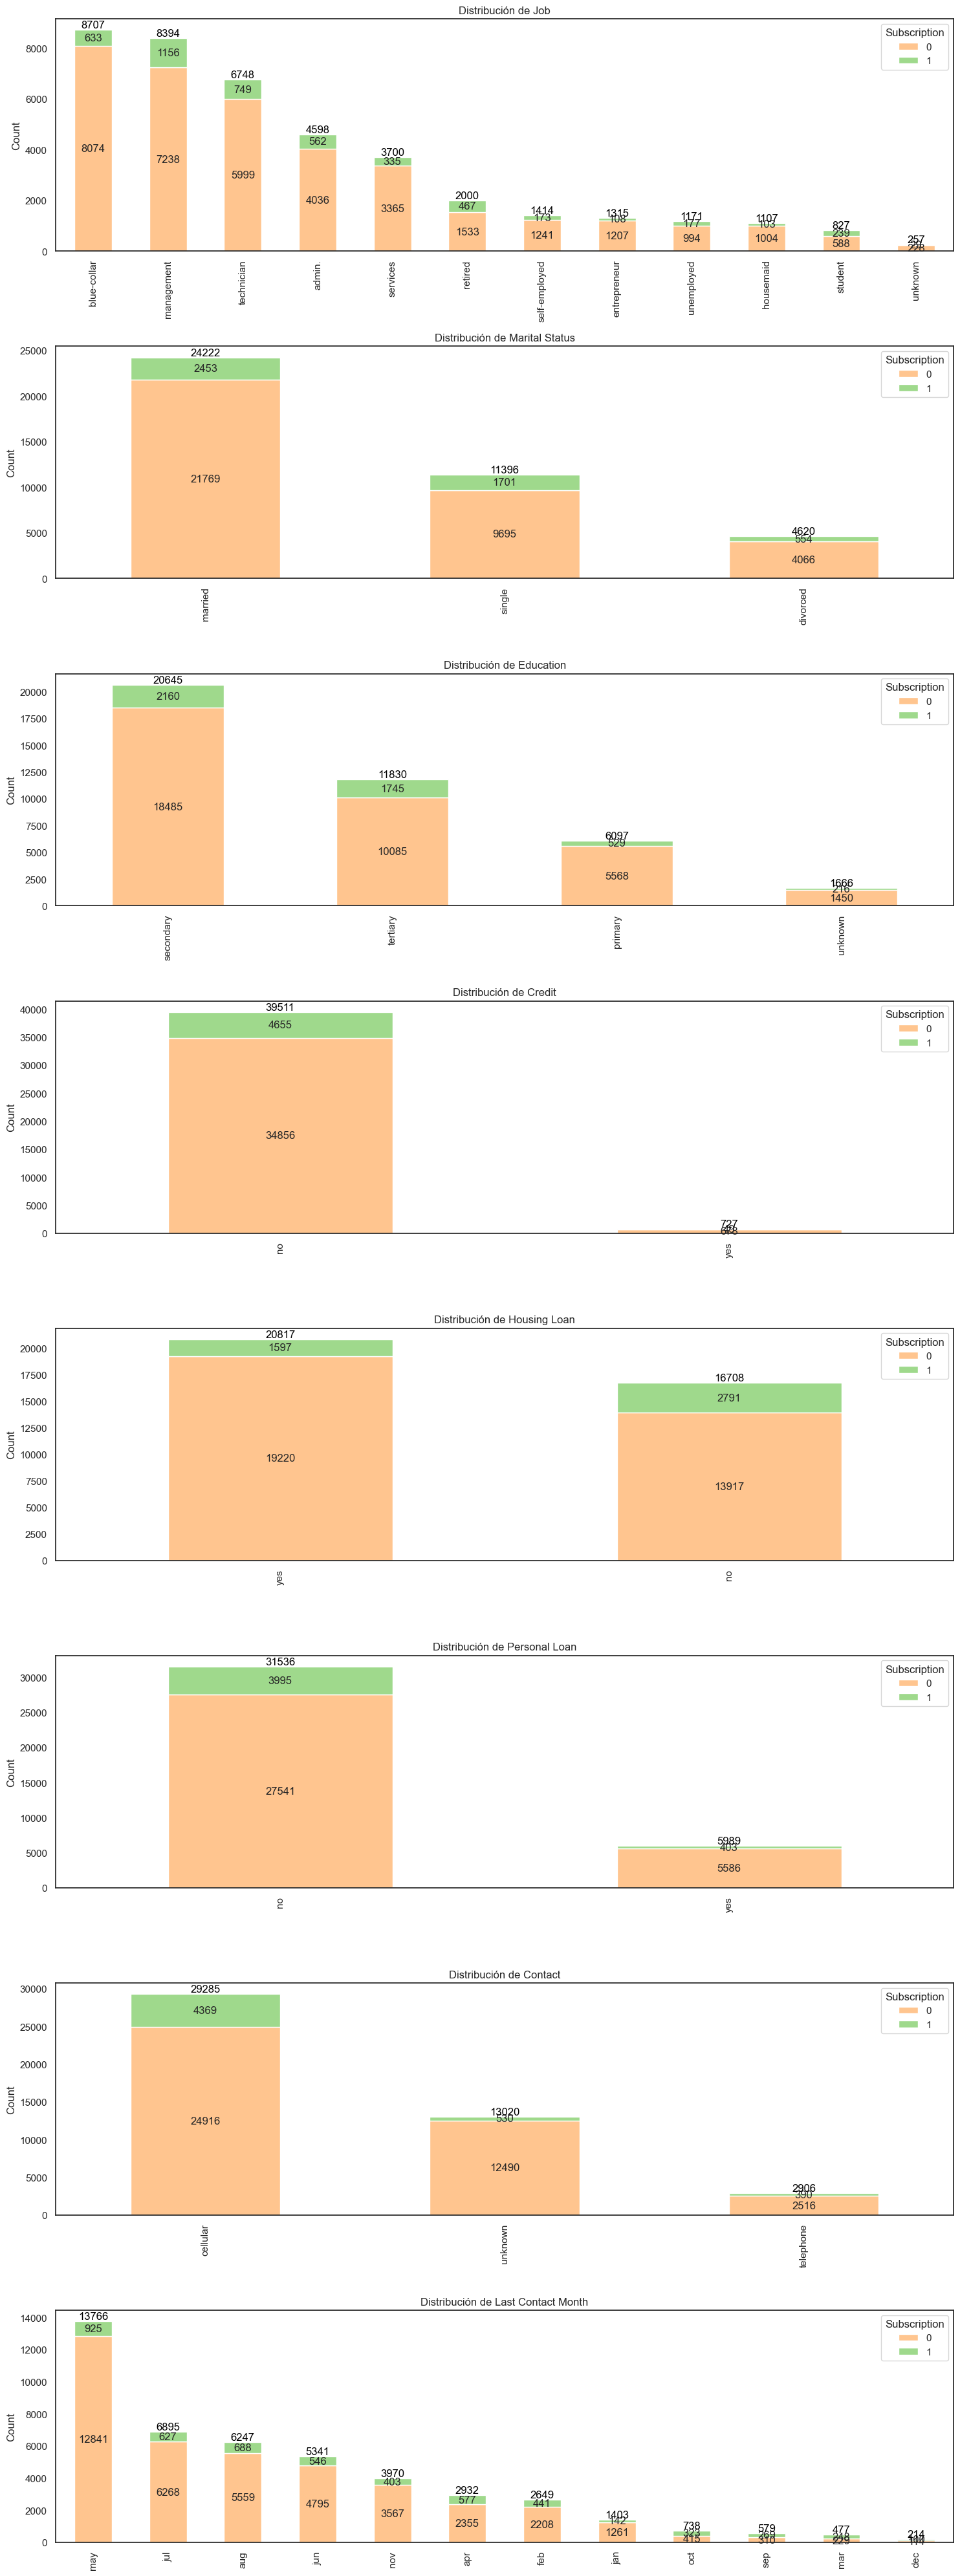

In [20]:
# Suponiendo que df_raw es tu DataFrame
columns_for_plot = ['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan', 'Personal Loan', 'Contact', 'Last Contact Month']

# Configuraciones del gráfico
plt.figure(figsize=(15, 40))

for i, column in enumerate(columns_for_plot, 1):
    plt.subplot(len(columns_for_plot), 1, i)
    
    # Crear un DataFrame pivotado y ordenado de mayor a menor
    stacked_df = df_raw.groupby([column, 'Subscription']).size().unstack()
    stacked_df = stacked_df.reindex(stacked_df.sum(axis=1).sort_values(ascending=False).index)
    
    # Crear un gráfico de barras apiladas
    stacked_df.plot(kind='bar', stacked=True, color=['#FFC58F', '#9FD98C'], ax=plt.gca())
    
    plt.title(f'Distribución de {column}')
    plt.xlabel('')
    plt.ylabel('Count')
    
    # Añadir etiquetas con valores de las barras
    for p in plt.gca().patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_xy() 
        if height > 0:
            plt.text(x + width / 2, y + height / 2, str(int(height)), ha="center", va="center")
    
    # Añadir el total encima de ambas columnas apiladas
    for idx, value in enumerate(stacked_df.sum(axis=1)):
        plt.text(idx, value, str(int(value)), ha="center", va="bottom", color='black')
        
        

plt.tight_layout()
plt.show()

Se pueden remarcar algunos datos interesantes:
1. Mayo es por lejos el mes mas comun para contactar al cliente, pero no hay pruebas de que sea el mejor mes para obtener una subscripcion.
2. El contacto por celular parece ser mucho mas efectivo que por telefono.
3. Los que trabajan en managment tienen mas probabilidad de acceder a la subscripción.

Veamos si hay otras relaciónes que podemos descubrir entre variables numericas y no numéricas

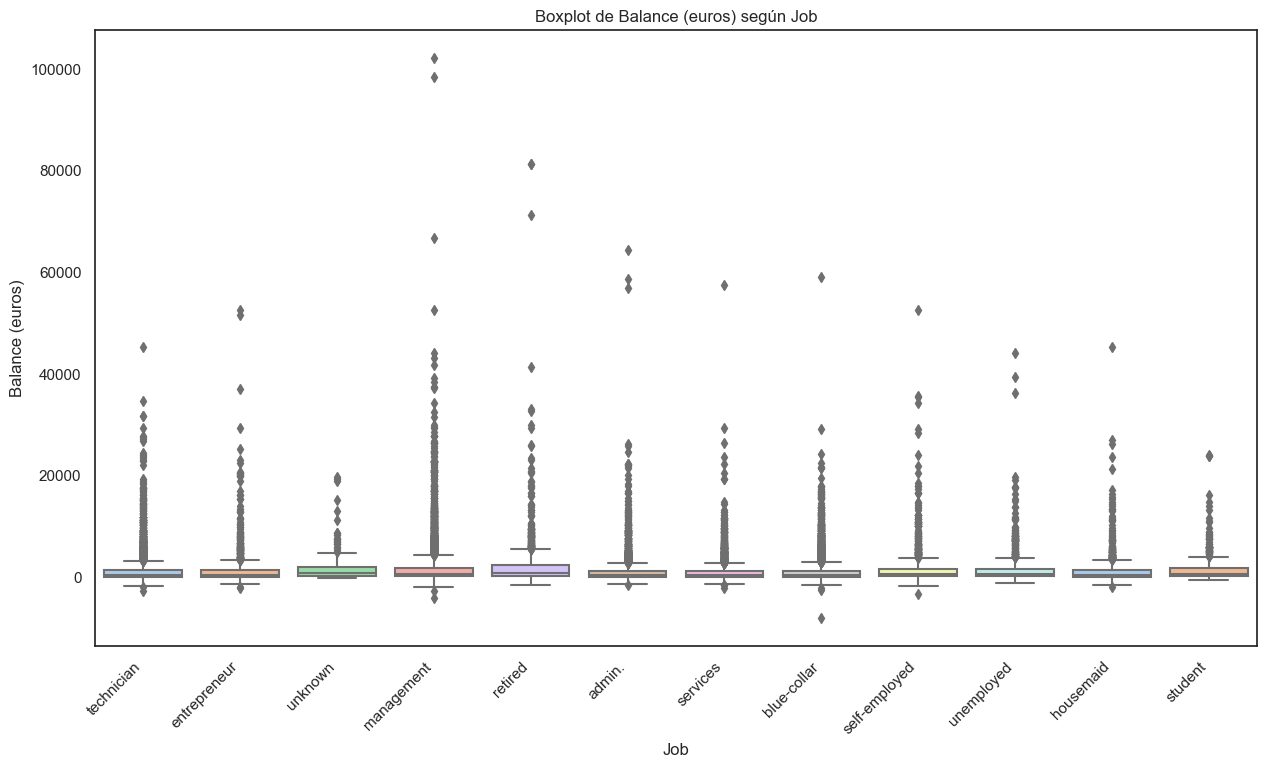

In [21]:
plt.figure(figsize=(15, 8))

# Crear un boxplot
sns.boxplot(x='Job', y='Balance (euros)', data=df_raw, palette='pastel')

plt.title('Boxplot de Balance (euros) según Job')
plt.xlabel('Job')
plt.ylabel('Balance (euros)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()

Ajustemos la escala para poder verlo mejor

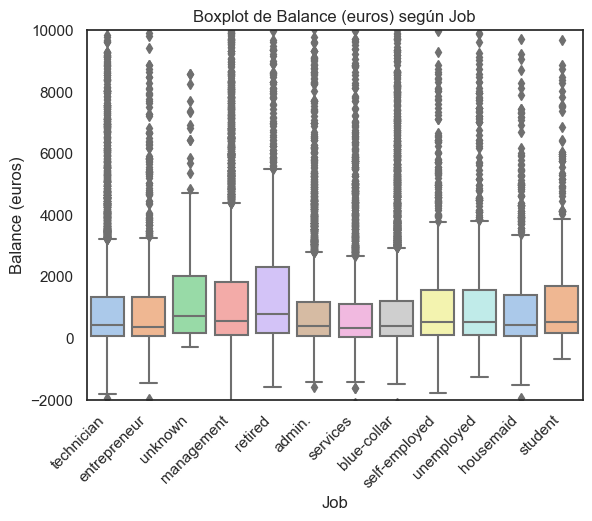

In [22]:
sns.boxplot(x='Job', y='Balance (euros)', data=df_raw, palette='pastel')

plt.title('Boxplot de Balance (euros) según Job')
plt.xlabel('Job')
plt.ylabel('Balance (euros)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

# Establecer el límite del eje y en 10000
plt.ylim(bottom = -2000, top=10000)

plt.show()

Mandagement y retired son las clases que tienden a tener un poco mas de balance en sus cuentas bancarias, pero está todo bsatante equilibrado

Veamos si pasa lo mismo con la educación

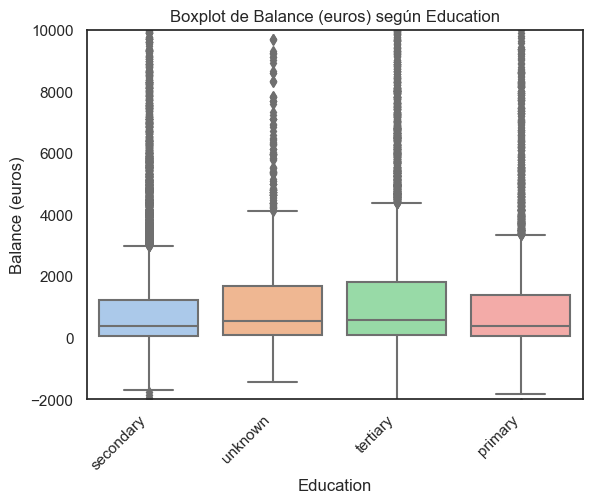

In [23]:
sns.boxplot(x='Education', y='Balance (euros)', data=df_raw, palette='pastel')

plt.title('Boxplot de Balance (euros) según Education')
plt.xlabel('Education')
plt.ylabel('Balance (euros)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

# Establecer el límite del eje y en 10000
plt.ylim(bottom = -2000, top=10000)

plt.show()

Naturalmente los que tienen educación terciaria tienden a tener más balance que los de primario y secundario, pero no es por mucho

Hagamos el mismo analisis pero con la edad

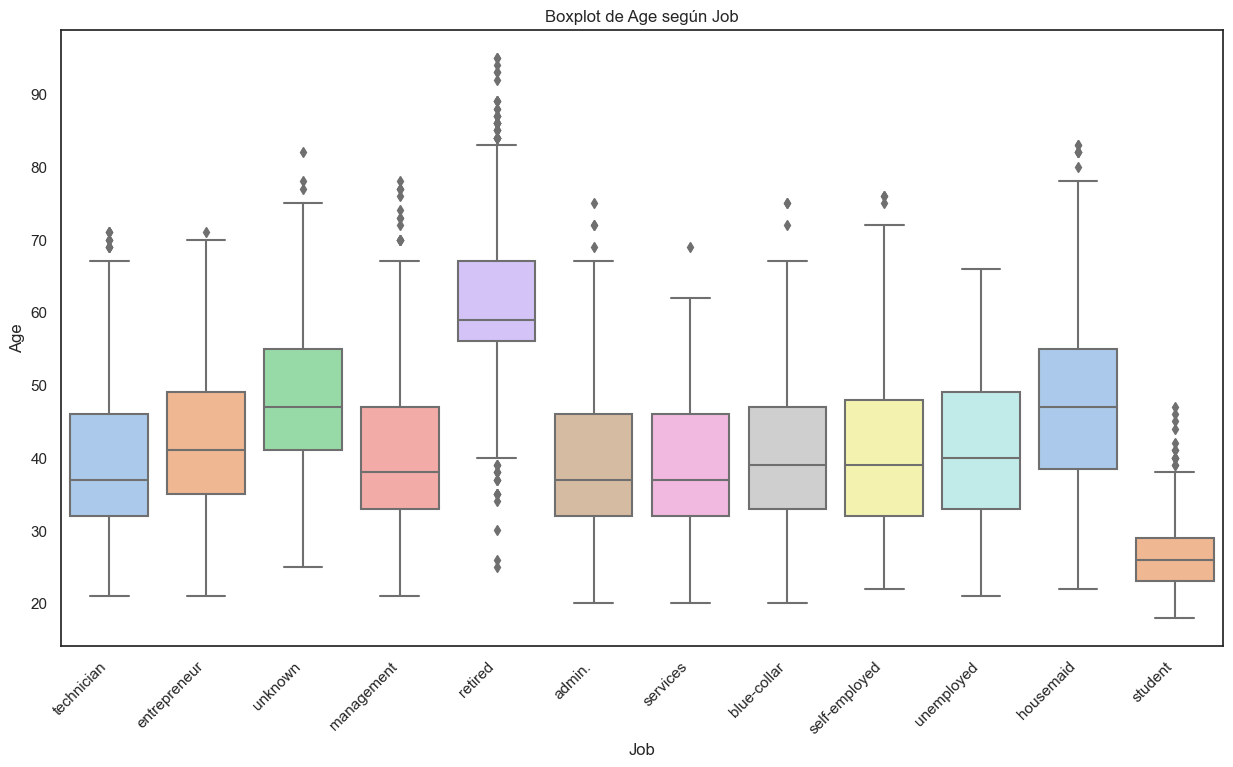

In [24]:
plt.figure(figsize=(15, 8))

# Crear un boxplot
sns.boxplot(x='Job', y='Age', data=df_raw, palette='pastel')

plt.title('Boxplot de Age según Job')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()

Tiene sentido que as personas que estan retiradas tengan una edad elevada, mientras que los estudiantes son los mas joevenes.

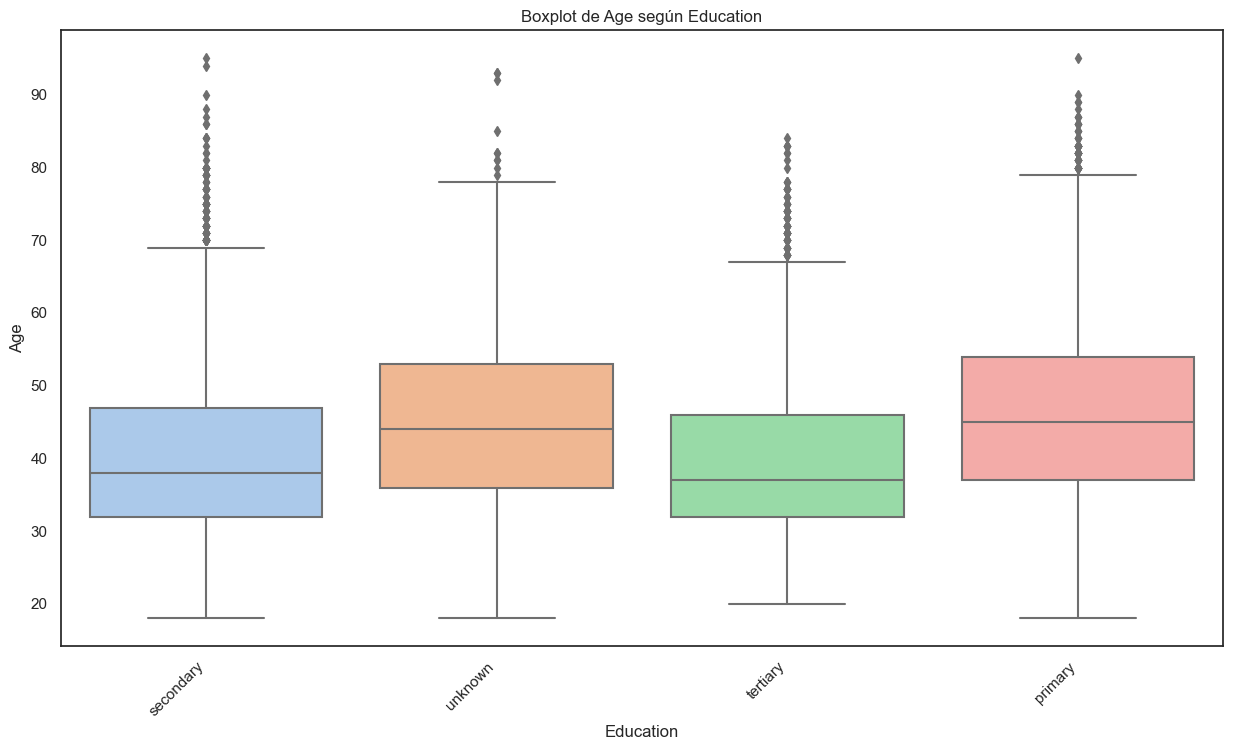

In [25]:
plt.figure(figsize=(15, 8))

# Crear un boxplot
sns.boxplot(x='Education', y='Age', data=df_raw, palette='pastel')

plt.title('Boxplot de Age según Education')
plt.xlabel('Education')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()

Es curioso que la mediana mas alta lo tiene el grupo que solo terminó el primario, mientras que las personas que hicieron un terciario sin las mas jovenes

Veamos ahora como puede afectar a la variable objetivo el resultado de la última campaña

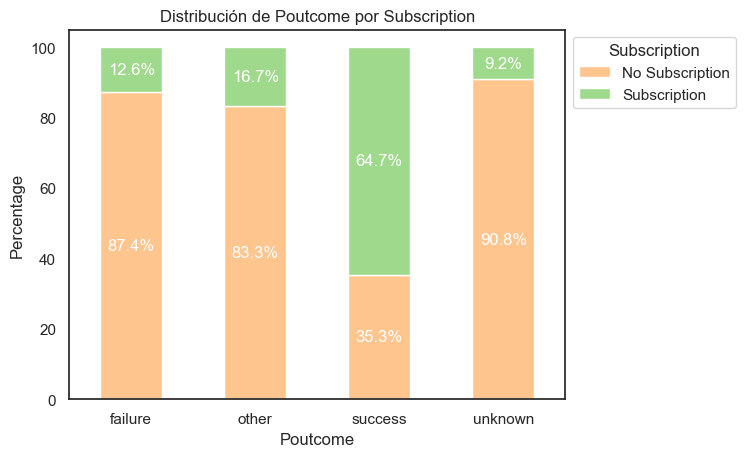

In [26]:
# Crear un DataFrame pivotado
stacked_df = df_raw.groupby(['Poutcome', 'Subscription']).size().unstack()

# Calcular el porcentaje de Subscription
stacked_df_percentage = stacked_df.div(stacked_df.sum(axis=1), axis=0) * 100

# Crear un gráfico de barras apiladas
stacked_df_percentage.plot(kind='bar', stacked=True, color=['#FFC58F', '#9FD98C'])

plt.title('Distribución de Poutcome por Subscription')
plt.xlabel('Poutcome')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario

# Añadir etiquetas con valores de las barras
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    if height > 0:
        plt.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha="center", va="center", color='white')

plt.legend(title='Subscription', loc='upper left', labels=['No Subscription', 'Subscription'], bbox_to_anchor=(1, 1))

plt.show()

Está claro que si la campaña anterior fue un exito, hay una alta probabilidad de que el cliente se subscriba para esta campaña.